<a href="https://colab.research.google.com/github/KleytonRodrigues/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb_Paris_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://www.melhoresdestinos.com.br/wp-content/uploads/2015/11/Dicas-Airbnb.jpg">


---

# Análise dos Dados do Airbnb - ***Paris, França***

Paris, é cidade mais populosa de toda a França, com aproximadamente 105Km2, possui cerca de 2.148.271 habitantes. O charme de suas avenidas encantam moradores e turistas.

Para Turismo existe o museu louvre, um dos mais famosos do mundo, que tem obras como a *Mona Lisa*. Temos a *Torre Eiffel* que tem cerca de 300 metros de altura e aproximadamente 7,3 toneladas de ferro e recebe milhões de visitantes todos os anos. Temos a Catedral Notedrame que teve acontecimentos históricos como a coroação do imperador napoleão(que foi coroado por ele mesmo). A Catedral está fechada para reformas desde 2019 após incêndio que destriu parte do teto.

Temos inúmeras atrações e passeios para fazer em paris, lugares históricos para se visitar, restaurantes por ter uma gastronomia muito forte. E não deixa de ser uma cidade que possui muitos lugares para se fazer compras.

></center><img alt="Colaboratory logo" width="100%" src="https://image.freepik.com/free-photo/beautiful-wide-shot-eiffel-tower-paris-surrounded-by-water-with-ships-colorful-sky_181624-5118.jpg"></center>


O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Paris, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Summary information and metrics for listings in Paris (good for visualisations).*

In [23]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [24]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2020-12-14/visualisations/listings.csv")

## Análise dos Dados


Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [25]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86993,2.36251,Entire home/apt,125,3,1,2019-01-02,0.04,1,364
1,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83349,2.31852,Entire home/apt,60,2,9,2019-10-24,0.19,1,2
2,4890,Quiet Historic & Cute +Free Cruise,6792,Ryan Of Cobblestone,NaN,Temple,48.86409,2.35651,Entire home/apt,69,5,23,2020-09-07,0.21,14,67
3,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85207,2.35871,Entire home/apt,62,1,231,2020-11-05,1.65,1,90
4,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85758,2.35275,Entire home/apt,53,15,269,2020-08-15,2.28,3,348


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 65917 entradas e 74 variáveis (`listings.csv.gz`).

In [26]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 65917
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [27]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.237996
last_review                       0.237996
name                              0.000971
host_name                         0.000425
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

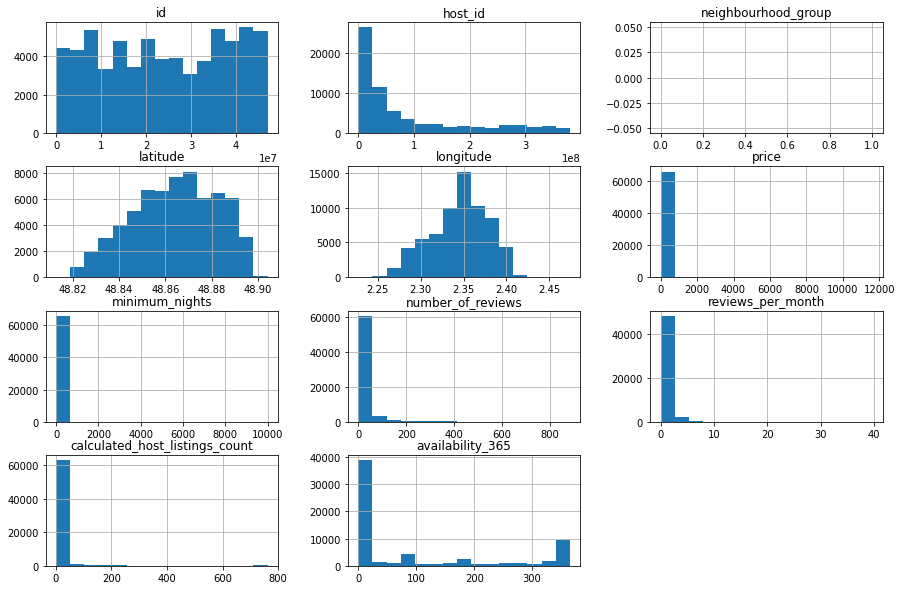

In [28]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));



### **Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [29]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,65917.000000,65917.000000,65917.000000,50229.000000,65917.000000,65917.000000
mean,114.280201,5.656113,18.783394,0.689335,16.427098,96.354173
std,220.155923,44.279940,40.678117,0.983954,86.017717,137.362947
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,59.000000,1.000000,1.000000,0.130000,1.000000,0.000000
50%,80.000000,2.000000,5.000000,0.360000,1.000000,0.000000
75%,120.000000,4.000000,18.000000,0.870000,2.000000,179.000000
max,11600.000000,9999.000000,882.000000,39.620000,762.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 132, porém seu valor máximo é 11600.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### **Boxplot para minimum_nights**

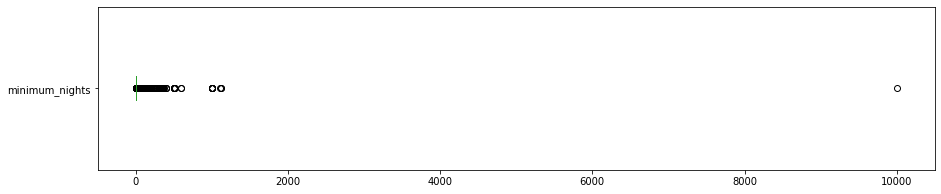

minimum_nights: valores acima de 30:
906 entradas
1.3745%


In [30]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### **Boxplot para price**

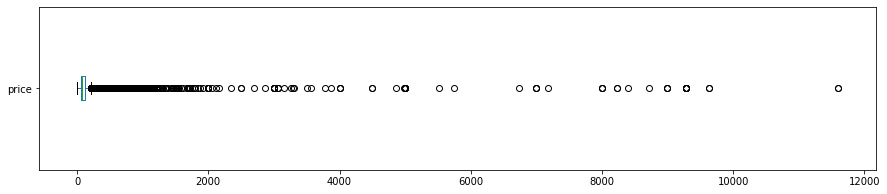


price: valores acima de 1500
90 entradas
0.1365%


In [31]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### **Histogramas sem outliers**

Já que identificamos outliers nas variáveis *price* e *minimum_nights*, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

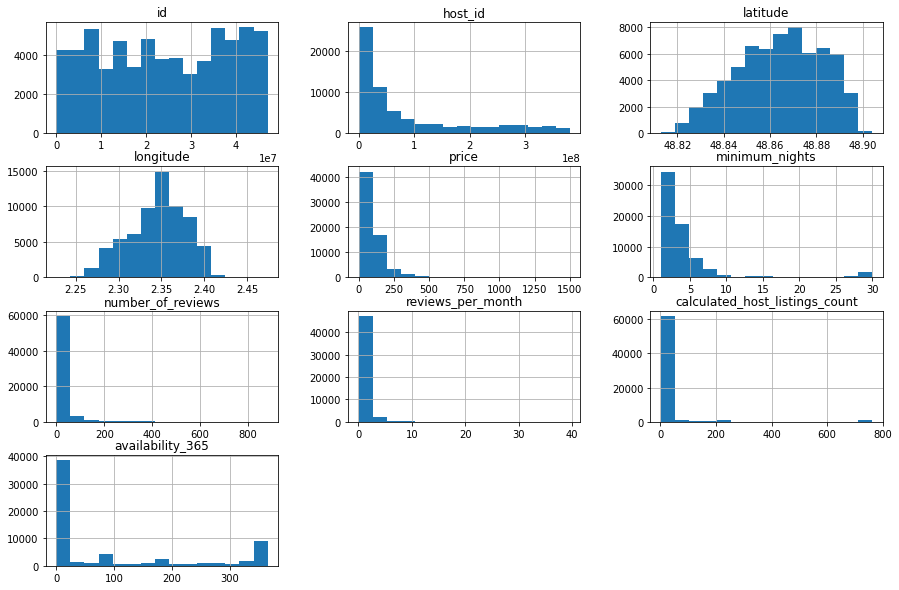

In [32]:
# remover os *outliers* em um novo DataFrame

# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));




Agora iremos focar na variável price.

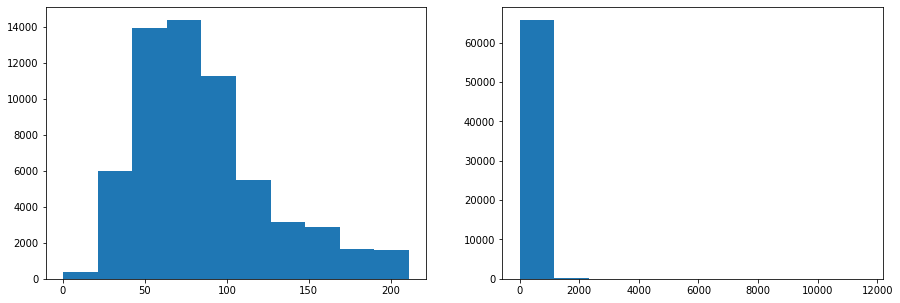

In [33]:
price_outliers = df['price']

Q1 = price_outliers.quantile(.25)
Q3 = price_outliers.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ


selecao = (price_outliers >= limite_inferior) & (price_outliers <= limite_superior)
df_clean = df[selecao]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Dados para cada subplot
ax1.hist(df_clean['price'])
ax2.hist(df['price']);

Podemos analisar que a maioria das locações tem um preço entre €25 a €100.
Agora podemos analisar o preço por acomodação depois da remoção dos Outliers na variável price.

Agora podemos analisar o preço por acomodação depois da remoção dos Outliers na variável *price*

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


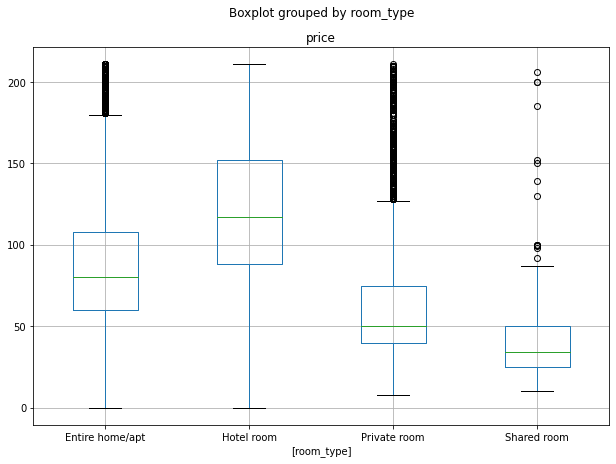

In [34]:
df_clean.boxplot(['price'], by = ['room_type'], figsize=(10,7), )
plt.show();

Podemos analisar que:

*Entire home/apt*, *Hotel room* e *Shered room* possuem uma mediana iguais e Private room possui uma maior distribuição;

Podemos perceber que *Private room* tem maior distribuição e possui Outliers;

*Shered room* possui os menores preços que faz sentido quando é quarto compartilhado;

### **Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [35]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

# mostrar a matriz de correlação

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.003339,0.025908,0.015779,0.087963,0.207700
minimum_nights,-0.003339,1.000000,-0.008214,-0.018385,0.006272,0.051103
number_of_reviews,0.025908,-0.008214,1.000000,0.754029,-0.014333,0.204344
reviews_per_month,0.015779,-0.018385,0.754029,1.000000,0.019270,0.250390
calculated_host_listings_count,0.087963,0.006272,-0.014333,0.019270,1.000000,0.073068
availability_365,0.207700,0.051103,0.204344,0.250390,0.073068,1.000000


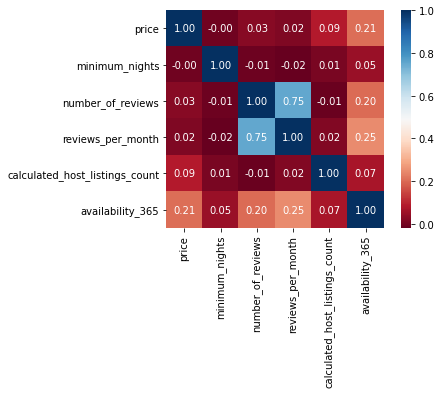

In [36]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Qual a média dos preços de aluguel?**

Conseguimos identificar a média dos preços dos alugueis atraves da coluna **price** e por tipo de acomodação.

In [37]:
# ver a média da coluna `price``
df.groupby("room_type")["price"].mean()

room_type
Entire home/apt    116.240189
Hotel room         215.582197
Private room        84.404686
Shared room         48.384248
Name: price, dtype: float64

### **Quais os bairros com maiores locações?** 

In [38]:
df_clean['neighbourhood'].value_counts()[:5]


Buttes-Montmartre      7151
Popincourt             6099
Vaugirard              4641
Entrepôt               4466
Batignolles-Monceau    4133
Name: neighbourhood, dtype: int64

Os bairros que possuem mais locações são: **Buttes_Montmartre, Popincourt, Vaugirard, Entrepôt e Batignolles_Monceau**.

### **Qual o tipo de imóvel mais alugado no Airbnb em Paris?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [39]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    52024
Private room        7191
Hotel room           975
Shared room          410
Name: room_type, dtype: int64

Acima, podemos destacar que, *Entire home/apt* é o tipo de locação com mais acomodações, e Shared room o que tem menos acomodações.

In [40]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.858482
Private room       0.118663
Hotel room         0.016089
Shared room        0.006766
Name: room_type, dtype: float64

Podemos verificar que em porcentagem, temos os seguintes números:

**Entire home/apt** tem ≅ 86%

**Private room** tem ≅ 11%

**Hotel room** tem ≅ 2%

**Shared room** tem ≅ 0,6%

### **Qual a localidade mais cara de Paris?**



Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [41]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Élysée            106.764003
Hôtel-de-Ville    106.405452
Louvre            106.154856
Temple            102.296296
Luxembourg        101.588310
Bourse            100.295005
Palais-Bourbon     99.310611
Passy              96.950368
Panthéon           95.476679
Opéra              93.467692
Name: price, dtype: float64

Acima, vemos que bairros como Élysée, Luxembourg, Louvre e Palais-Bourbon são localidades mais populares e por isso possuem os maiores preços na média de cada bairro.

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

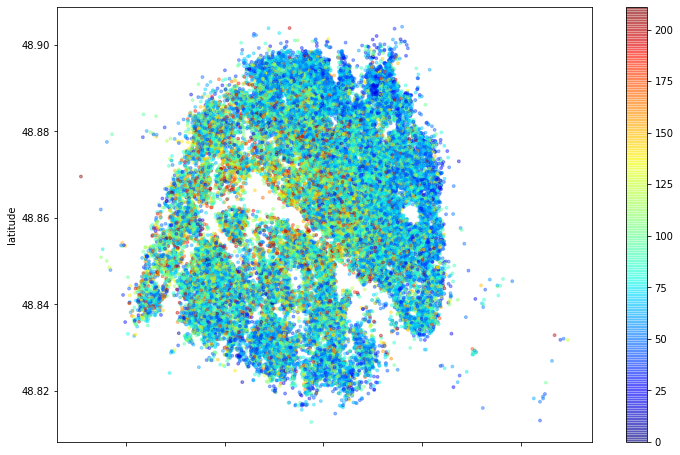

In [42]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Sabemos que os anfitriões do Airbnb normalmente costuma colocar um minimo de noites, ainda mais em alta temporada que sai mais vantajoso para quem vai alugar imóveis. Sendo assim, verificamos que o minimo de noite na média é de aproximadamente 6 noites.

In [43]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].mean()

5.647112211221122

## Conclusões


Paris é uma cidade incrível, o turismo é muito forte pela bela paisagem, gastronomia e o que a cidade pode oferecer para quem vai viajar.


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis que distorcem as informações quando apresentados gráficos sem limpeza. Conseguimos perceber a importância da estatística quando falamos em Ciência de dados.
Conseguimos identificar quais bairros possuem mais locações e a média dos preços de cada bairro.


Por fim, esse dataset é uma versão resumida, ideal para uma análise inicial, mas podemos perceber que já podemos extrair muitas informações, imagina um dataset que possui mais atributos e variáveis? Conseguimos extrair informações que nem imaginamos que podem ser analisadas e nos dar insights de um estudo completo
